In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


#Read the data file using the prropriate separator as input to read_csv()

df = pd.read_csv('smoking_driking_dataset_Ver01.csv')
df.head(5)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [3]:
#checking dimensions
df.shape

(991346, 24)

In [4]:
# check if there is NaN in the dataset
df.isna().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [5]:
# looking at column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [3]:
#dropping smokers because we will not be anaylzing it
df.drop(columns=['SMK_stat_type_cd'], inplace=True)

In [4]:
#making all gender binary
df['sex'] = (df['sex'] == 'Male').astype(int)
#making DRK_YN binary
df['DRK_YN'] = (df['DRK_YN'] == 'Y').astype(int)
df.head(5)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,0


In [5]:
y = df['DRK_YN']
x = df.drop('DRK_YN', axis=1)
x.head(10)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,193.0,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,228.0,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,136.0,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,201.0,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,199.0,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0
5,1,50,165,55,75.0,1.2,1.5,1.0,1.0,142.0,...,218.0,77.0,95.0,232.0,13.8,3.0,0.8,29.0,40.0,37.0
6,0,45,150,55,69.0,0.5,0.4,1.0,1.0,101.0,...,196.0,66.0,115.0,75.0,12.3,1.0,0.8,19.0,12.0,12.0
7,1,35,175,65,84.2,1.2,1.0,1.0,1.0,132.0,...,185.0,58.0,107.0,101.0,14.4,1.0,0.8,18.0,18.0,35.0
8,1,55,170,75,84.0,1.2,0.9,1.0,1.0,145.0,...,217.0,56.0,141.0,100.0,15.1,1.0,0.8,32.0,23.0,26.0
9,1,40,175,75,82.0,1.5,1.5,1.0,1.0,132.0,...,195.0,60.0,118.0,83.0,13.9,1.0,0.9,21.0,38.0,16.0


In [9]:
print(df['age'].value_counts())

age
40    130385
50    129434
45    118355
55    111223
60    106063
35     84726
30     77600
25     64370
65     52961
70     50666
75     25333
20     21971
80     14968
85      3291
Name: count, dtype: int64


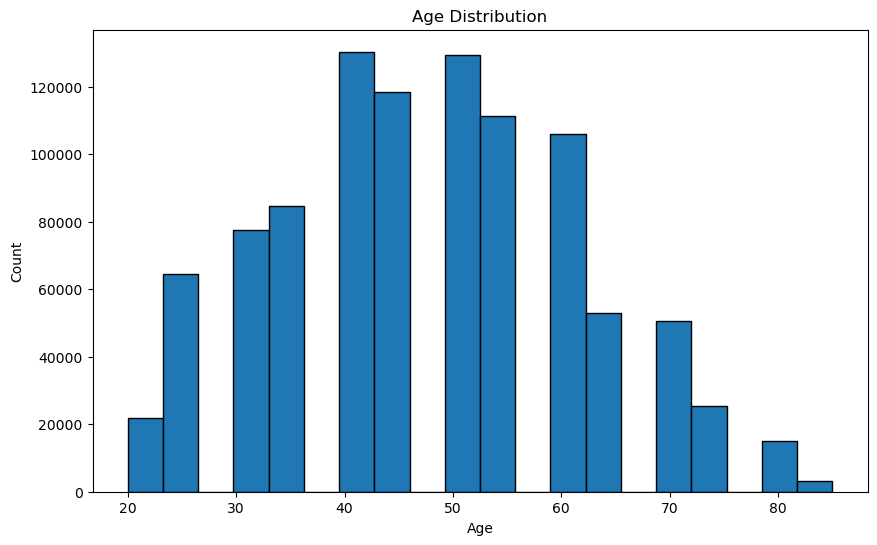

In [10]:
plt.figure(figsize=(10, 6))  # Adjust the size as needed
plt.hist(df['age'], bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
sex_counts = df['sex'].value_counts()
plt.figure(figsize=(7, 5))  # Adjust the size as needed
sex_counts.plot(kind='bar')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keeps the labels horizontal
plt.show()

In [ ]:
drinker_counts = df['DRK_YN'].value_counts()
plt.figure(figsize=(7, 5))  # Adjust the size as needed
drinker_counts.plot(kind='bar')
plt.title('Drinker Distribution')
plt.xlabel('Drinker')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keeps the labels horizontal
plt.show()


x and y are setup, here. We can try PCA dimensionality reduction and see if it yields better results

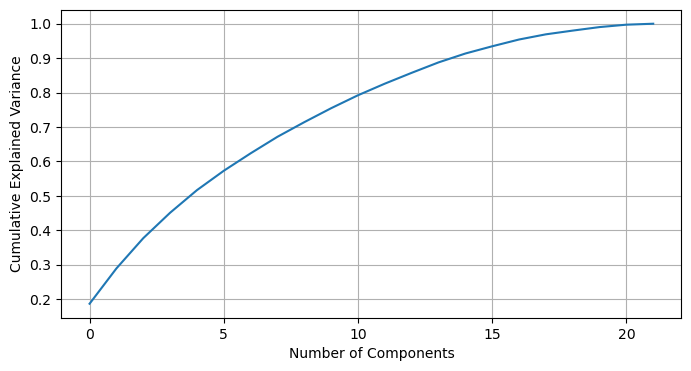

Number of components to explain 95% variance: 17
[0.18615714 0.1026232  0.08788977 0.07392775 0.06568667 0.05632473
 0.05069812 0.04808058 0.04251237 0.04052846 0.03765877 0.03372251
 0.03147249 0.03029349 0.02579443 0.02104819 0.01967803]


In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Fit PCA without specifying the number of components
pca = PCA()
pca.fit(x_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative variance
plt.figure(figsize=(8,4))
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Determine the number of components for desired explained variance, e.g., 95%
n_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components to explain 95% variance: {n_components}")

# Apply PCA with the determined number of components
pca_optimal = PCA(n_components=n_components)
x_pca = pca_optimal.fit_transform(x_scaled)

print(pca_optimal.explained_variance_ratio_)


In [13]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

xgb = XGBClassifier()

xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.72


In [12]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

xgb = XGBClassifier()

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

best_xgb = XGBClassifier(**best_params)
best_xgb.fit(x_train, y_train)

y_pred = best_xgb.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Improved Accuracy: {accuracy:.2f}")


Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   7.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   9.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.9; total time=   4.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=200, subsample=0.9; total time=   8.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=300, subsample=0.9; total time=  11.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   8.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   4.0s


/Users/sambryant/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   5.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   9.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   4.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.9; total time=   4.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=200, subsample=0.9; total time=   8.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=300, subsample=1.0; total time=  10.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   9.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.9; total time=  12.9s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimat

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   5.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   4.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=200, subsample=0.9; total time=   8.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=300, subsample=0.9; total time=  11.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   5.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   8.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estima

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   5.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   6.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.9; total time=   9.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=200, subsample=0.8; total time=   8.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=4, n_estimators=300, subsample=0.9; total time=  11.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=   5.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   8.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.9; total time=  13.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimat

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=  10.9s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   3.8s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   5.9s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   8.1s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=1.0; total time=   4.2s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=4, n_estimators=200, subsample=1.0; total time=   7.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=1.0; total time=   9.9s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   6.3s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=3, n_estimato

[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   9.5s
[CV] END colsample_bytree=0.9, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.9; total time=  12.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   3.2s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   5.6s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   7.7s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=200, subsample=0.8; total time=   6.9s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   3.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   8.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=4, n_estimators=10

[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=  11.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.9; total time=   3.8s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   5.5s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.9; total time=   8.5s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   7.4s
[CV] END colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=  10.4s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.9; total time=   5.4s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=300,

[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=200, subsample=0.9; total time=   6.6s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=4, n_estimators=300, subsample=1.0; total time=   9.1s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   7.7s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=  11.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   3.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   6.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   8.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=1.0; total time=   4.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, n_estimators

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=4, n_estimators=300, subsample=1.0; total time=  10.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   9.7s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=  13.0s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   3.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   5.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=  12.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   3.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   3.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   3.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   5.7s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.9; total time=   8.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=100, subsample=1.0; total time=   3.9s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=200, subsample=1.0; total time=   6.4s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=4, n_estimators=300, subsample=1.0; total time=   9.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   8.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=  11.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100,

In [14]:
#PCA WITH LOG REGRESSION
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()

log_reg.fit(x_train, y_train)

y_pred = log_reg.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.71


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

# Initialize the Bayesian Ridge Regression model
bayesian_ridge = BayesianRidge()

bayesian_ridge.fit(x_train, y_train)

y_pred = bayesian_ridge.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 0.19
R² Score: 0.23


In [8]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

catboost_model = CatBoostRegressor(verbose=0) 

catboost_model.fit(x_train, y_train)

y_pred = catboost_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 0.18
R² Score: 0.28


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(x)
x = pd.DataFrame(scaled_x, columns=x.columns)
x.head(5)

In [ ]:
combined_df = pd.concat([x, y], axis=1)
corr_matrix = combined_df.corr()
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
# pair plot
sns.set(style="ticks", color_codes=True)
plt.figure(figsize=(12,12))
sns.pairplot(combined_df)

In [ ]:
# columns: 2,3,4,10,11,12,13,17,22
# converterd: ['age', 'height', 'weight', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'hemoglobin', 'gamma_GTP']
# these columns seem to have a high impact on the output of DRK_Y. There are a lot of no's and yes's.


In [10]:
#unnormalized data
from sklearn.model_selection import train_test_split
cols = ['sex','age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'DBP', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'gamma_GTP']
x_train, x_test, y_train, y_test = train_test_split(df[cols], y, test_size=0.2)

In [11]:
from xgboost import XGBClassifier


model = XGBClassifier()


In [12]:
model.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [13]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(x_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 71.64%


In [1]:
# SVM RBF
from sklearn.svm import SVC
svc= SVC(kernel = 'rbf', C= 10)


In [ ]:
svc.fit(x_train, y_train)
y_svc_pred = svc.predict(x_test)

In [ ]:
accuracy_svc = accuracy_score(y_test, y_svc_pred)

print(f"Accuracy: {accuracy_svc * 100:.2f}%")

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_logreg_pred = model.predict(x_test)

In [ ]:
accuracy_logreg = accuracy_score(y_test, y_logreg_pred)

print(f"Accuracy: {accuracy_logreg * 100:.2f}%")

In [ ]:
# Lets try PCA Dimensional Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca_result = pca.fit_transform(df)

In [ ]:
pca_columns = ['pca-1', 'pca-2', 'pca-3','pca-4', 'pca-5', 'pca-6','pca-7', 'pca-8', 'pca-9','pca-10']
PCA_df = pd.DataFrame(pca_result, columns=pca_columns)

In [ ]:
#try PCA with models
